In [16]:
#(this will take a few minutes to install all the dependences!)
!pip install deeplabcut
#!pip install git+https://github.com/DeepLabCut/DeepLabCut.git
!pip install --upgrade scikit-image
%reload_ext numpy
%reload_ext scipy
%reload_ext matplotlib
%reload_ext mpl_toolkits

!pip install git+https://github.com/aleju/imgaug.git

  Using cached scikit_image-0.18.1-cp39-cp39-manylinux1_x86_64.whl (28.9 MB)
  Attempting uninstall: scikit-image
    Found existing installation: scikit-image 0.19.3
    Uninstalling scikit-image-0.19.3:
      Successfully uninstalled scikit-image-0.19.3
  Using cached scikit_image-0.19.3-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (14.0 MB)
  Attempting uninstall: scikit-image
    Found existing installation: scikit-image 0.18.1
    Uninstalling scikit-image-0.18.1:
      Successfully uninstalled scikit-image-0.18.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
deeplabcut 2.2.1 requires scikit-image<=0.18.1,>=0.17, but you have scikit-image 0.19.3 which is incompatible.
  Cloning https://github.com/aleju/imgaug.git to /tmp/pip-req-build-q6nsn61g
  Running command git clone -q https://github.com/aleju/imgaug.git /tmp/pip-req-build-q6nsn61g
  Res

In [17]:
# Importing the toolbox (takes several seconds) 

import pandas as pd
from pathlib import Path
import numpy as np
import os
import matplotlib.pyplot as plt

In [18]:
#CHANGE 'video' and 'DLCscorer' based on the video analysis you want to plot
#CHANGE 'bpt' if you would like to analyze a different body part
#CHANGE 'Dataframe' to read into the absolute path of your video in "_filtered.h5" format
video='snrbaseline_3903_f_Trial1.mp4'

DLCscorer='DLC_resnet50_Pilot_v1_single_animalJun29shuffle1_400000'

#dataname = str(Path(video).stem) + DLCscorer + '.h5'

bpt = 'snout'

#loading output of DLC

Dataframe = pd.read_hdf('/home/mclea2ll-local/Documents/DeepLabCut/Video_Analysis/SNR_LMO7_turning_Lily/snrbaseline_3903_f_Trial1DLC_resnet50_Pilot_v1_single_animalJun29shuffle1_400000_filtered.h5')

In [19]:
#Removes the weird tail of 0.000000 values. Don't worry, it won't mess anything up - see the last frame
#  with real data and compare the index.
Dataframe = Dataframe[Dataframe[DLCscorer][bpt]['likelihood'] != 0]

Dataframe

scorer    DLC_resnet50_Pilot_v1_single_animalJun29shuffle1_400000             \
bodyparts                                                      tl              
coords                                                          x          y   
0                                                1101.175049       45.162491   
1                                                1101.175049       45.162491   
2                                                1101.175049       45.162491   
3                                                 296.164246       39.299973   
4                                                 295.424683       38.989437   
...                                                      ...             ...   
45015                                              22.823471       31.895466   
45016                                              22.980249       32.031223   
45017                                             293.307190       38.845886   
45018                                             293.307190       38.845886   
45019                                             293.307190       38.845886   

scorer                                                               \
bodyparts                      tr                                bl   
coords    likelihood            x          y likelihood           x   
0           0.017579  1101.304932  47.094608   0.799862  294.142059   
1           0.022425  1101.304932  47.407497   0.943960  294.142059   
2           0.020505  1101.304932  47.696175   0.951451  294.310486   
3           0.016805  1101.304932  47.873531   0.969942  294.332184   
4           0.225870  1101.179810  47.995899   0.969264  294.332184   
...              ...          ...        ...        ...         ...   
45015       0.085373  1101.403442  47.358635   0.991163  296.750977   
45016       0.105259  1101.445679  47.294197   0.988206  296.750977   
45017       0.230599  1101.462280  47.294197   0.994944  296.750977   
45018       0.128324  1101.462280  47.226101   0.994203  295.965027   
45019       0.375554  1101.445679  47.201126   0.994369  295.778961   

scorer                                         ...                           \
bodyparts                                  br  ... left_backpaw   tail_base   
coords              y likelihood            x  ...   likelihood           x   
0          680.569336   0.166631  1091.525269  ...     0.918647  530.856262   
1          680.569336   0.810377  1091.525269  ...     0.872324  530.856262   
2          680.569336   0.960209  1091.525269  ...     0.767691  530.856262   
3          680.247498   0.991447  1091.063965  ...     0.805490  529.737000   
4          679.377686   0.997116  1089.663696  ...     0.900847  528.688171   
...               ...        ...          ...  ...          ...         ...   
45015      678.864502   0.999280  1090.089355  ...     0.178509  914.141724   
45016      678.864502   0.998444  1090.002319  ...     0.168952  886.810303   
45017      679.340942   0.996607  1090.207153  ...     0.999698  297.439941   
45018      679.340942   0.998451  1090.002319  ...     0.999909  297.346588   
45019      679.340942   0.998930  1089.910400  ...     0.998945  297.346588   

scorer                                                               \
bodyparts                           tail_mid                          
coords              y likelihood           x           y likelihood   
0          184.834503   0.999536   98.198761  231.169052   0.096927   
1          185.951538   0.999818  133.833893  236.153458   0.013623   
2          185.951538   0.999769  555.771423  236.153458   0.004675   
3          185.951538   0.997774  551.256348  236.153458   0.136595   
4          179.917816   0.998958  551.256348  230.474121   0.870728   
...               ...        ...         ...         ...        ...   
45015      283.549194   0.987030  965.150208  241.131760   0.747705   
45016      286.344360   0.240043  959.393311  235.055878   0.057370

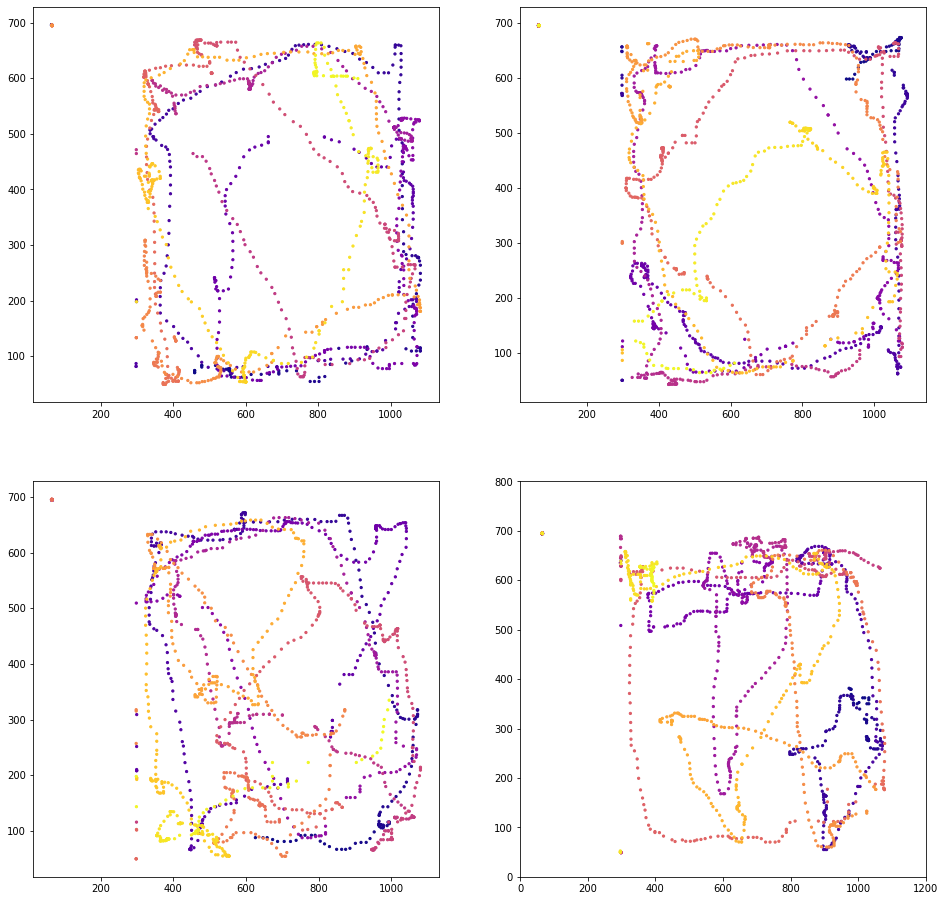

In [20]:
import math

fps = 25
fpm = fps * 60
numFramesTotal = len(Dataframe.index)
minutesTotal = math.floor(numFramesTotal / fpm) #gets number of minutes in the video, rounded down to plot each one

ten_min_increments = minutesTotal / 10

numColumns = 2

numRows = math.ceil(ten_min_increments / numColumns)

# If you want to "zoom in" on the mouse in each time interval, set sharex=False, sharey=False
# For equal scaling in all subplots, set sharex=True, sharey=True
fig, axs = plt.subplots(numRows, numColumns, sharex=False, sharey=False, figsize=(16,16)) 
plt.xlim(0, 1200)
plt.ylim(0, 800)

lowIndex = 0
highIndex = fpm
for n, ax in enumerate(axs.flatten()):
  subDf = Dataframe[lowIndex:highIndex]
  sub_xsnout = subDf[DLCscorer][bpt]['x'].values
  sub_ysnout = subDf[DLCscorer][bpt]['y'].values

  ax.scatter(sub_xsnout,sub_ysnout, s=5, c=subDf.index.values, cmap='plasma')
  plt.gca().invert_yaxis()

  lowIndex += fpm
  highIndex += fpm

for a in fig.axes:
    a.tick_params(
    axis='both',           # changes apply to the x-axis
    which='both',       # both major and minor ticks are affected
    bottom=True,
    top=False,
    left=True,
    right=False,
    labelleft=True,
    labelbottom=True)    # labels along the bottom edge are on
    
    
plt.show()

#BASELINE IS SHOWN BELOW

In [21]:
video='snrffz_3903_f_Trial1.mp4'

DLCscorer='DLC_resnet50_Pilot_v1_single_animalJun29shuffle1_400000'

#dataname = str(Path(video).stem) + DLCscorer + '.h5'

bpt = 'snout'

#loading output of DLC

Dataframe = pd.read_hdf('/home/mclea2ll-local/Documents/DeepLabCut/Video_Analysis/SNR_LMO7_turning_Lily/snrffz_3903_f_Trial1DLC_resnet50_Pilot_v1_single_animalJun29shuffle1_400000_filtered.h5')

In [22]:
Dataframe = Dataframe[Dataframe[DLCscorer][bpt]['likelihood'] != 0]

Dataframe

scorer    DLC_resnet50_Pilot_v1_single_animalJun29shuffle1_400000             \
bodyparts                                                      tl              
coords                                                          x          y   
0                                                  22.669004       31.896017   
1                                                  22.719198       31.912050   
2                                                  22.719198       31.912050   
3                                                  22.719198       31.912050   
4                                                  22.842560       32.223442   
...                                                      ...             ...   
135056                                            866.680664       -2.624710   
135057                                            866.680664       -2.544650   
135059                                            867.677612       -3.081278   
135060                                            867.677612       -2.544650   
135061                                            867.677612       -2.544650   

scorer                                                               \
bodyparts                      tr                                bl   
coords    likelihood            x          y likelihood           x   
0           0.022809  1100.995972  46.879566   0.976413  295.147949   
1           0.059915  1101.359253  47.195026   0.969554  295.233246   
2           0.057055  1101.359253  47.273808   0.969118  295.953949   
3           0.052648  1101.421387  47.273808   0.974323  295.953949   
4           0.054361  1101.458496  47.238796   0.985813  295.953949   
...              ...          ...        ...        ...         ...   
135056      0.037759   466.552277   0.302518   0.048185    1.805172   
135057      0.079953   466.552277   0.514263   0.090978    1.805172   
135059      0.112937   707.723450   0.251531   0.035439    2.119035   
135060      0.057171   707.723450   0.000000   0.049025    2.119035   
135061      0.077584   707.723450   0.000000   0.033283    2.119035   

scorer                                         ...                           \
bodyparts                                  br  ... left_backpaw   tail_base   
coords              y likelihood            x  ...   likelihood           x   
0          680.670288   0.990481  1089.786743  ...     0.999584  337.956024   
1          680.670288   0.993367  1090.171753  ...     0.992283  337.956024   
2          680.670288   0.994150  1090.171753  ...     0.703118  337.956024   
3          680.567261   0.998247  1089.856201  ...     0.781216  329.184143   
4          680.058411   0.998377  1089.856201  ...     0.174061  329.184143   
...               ...        ...          ...  ...          ...         ...   
135056     724.811584   0.000928   550.198425  ...     0.918554  225.680893   
135057     724.904236   0.001049   551.928711  ...     0.931808  213.543259   
135059     724.985657   0.001078   551.122192  ...     0.940311  213.543259   
135060     724.985657   0.000935   551.042786  ...     0.916866  207.592575   
135061     724.985657   0.000878   551.042786  ...     0.829548  207.592575   

scorer                                                               \
bodyparts                           tail_mid                          
coords              y likelihood           x           y likelihood   
0          504.424774   0.999286  372.218231  589.113708   0.996406   
1          504.424774   0.998924  372.218231  589.113708   0.997067   
2          504.424774   0.973580  372.218231  589.113708   0.807612   
3          484.808044   0.954454  328.088440  559.113953   0.033471   
4          473.936920   0.999714  325.352661  550.496094   0.983115   
...               ...        ...         ...         ...        ...   
135056     103.471680   0.174486  550.716064    1.507787   0.089968   
135057     104.811142   0.069237  550.350708    1.507787   0.175897

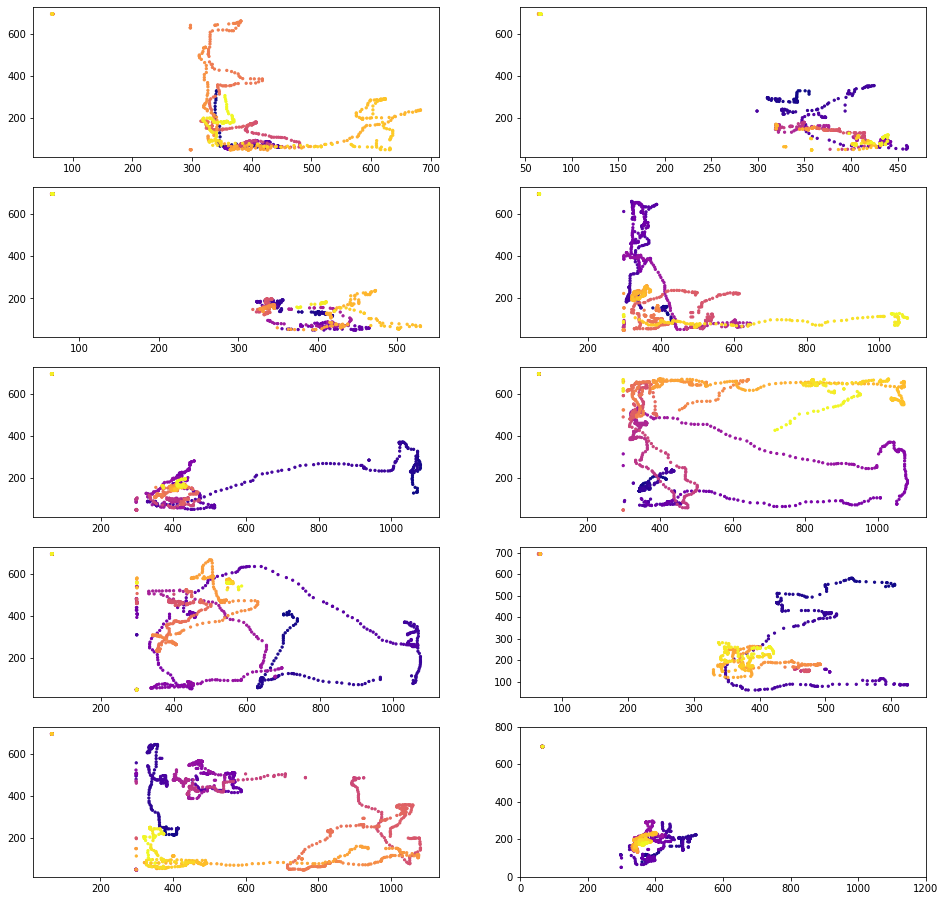

In [23]:
import math

fps = 25
fpm = fps * 60
numFramesTotal = len(Dataframe.index)
minutesTotal = math.floor(numFramesTotal / fpm) #gets number of minutes in the video, rounded down to plot each one

ten_min_increments = minutesTotal / 10

numColumns = 2

numRows = math.ceil(ten_min_increments / numColumns)

# If you want to "zoom in" on the mouse in each time interval, set sharex=False, sharey=False
# For equal scaling in all subplots, set sharex=True, sharey=True
fig, axs = plt.subplots(numRows, numColumns, sharex=False, sharey=False, figsize=(16,16)) 
plt.xlim(0, 1200)
plt.ylim(0, 800)

lowIndex = 0
highIndex = fpm
for n, ax in enumerate(axs.flatten()):
  subDf = Dataframe[lowIndex:highIndex]
  sub_xsnout = subDf[DLCscorer][bpt]['x'].values
  sub_ysnout = subDf[DLCscorer][bpt]['y'].values

  ax.scatter(sub_xsnout,sub_ysnout, s=5, c=subDf.index.values, cmap='plasma')
  plt.gca().invert_yaxis()

  lowIndex += fpm
  highIndex += fpm

for a in fig.axes:
    a.tick_params(
    axis='both',           # changes apply to the x-axis
    which='both',       # both major and minor ticks are affected
    bottom=True,
    top=False,
    left=True,
    right=False,
    labelleft=True,
    labelbottom=True)    # labels along the bottom edge are on
    
    
plt.show()

#FFZ IS SHOWN BELOW

In [27]:
hdf_path = '/home/mclea2ll-local/Documents/DeepLabCut/Video_Analysis/SNR_LMO7_turning_Lily/snrbaseline_3903_f_Trial1DLC_resnet50_Pilot_v1_single_animalJun29shuffle1_400000_filtered.h5'
Dataframe = pd.read_hdf(hdf_path)

DLCscorer='DLC_resnet50_Pilot_v1_single_animalJun29shuffle1_400000'
bpt = 'snout'

x_snout = Dataframe[DLCscorer][bpt]['x'].values
y_snout = Dataframe[DLCscorer][bpt]['y'].values

from mpl_toolkits.mplot3d import proj3d

def make_get_proj(self, rx, ry, rz):
    '''
    Return a variation on :func:`~mpl_toolkit.mplot2d.axes3d.Axes3D.getproj` that
    makes the box aspect ratio equal to *rx:ry:rz*, using an axes object *self*.
    '''

    rm = max(rx, ry, rz)
    kx = rm / rx; ky = rm / ry; kz = rm / rz;

    # Copied directly from mpl_toolkit/mplot3d/axes3d.py. New or modified lines are
    # marked by ##
    def get_proj():
        relev, razim = np.pi * self.elev/180, np.pi * self.azim/180

        xmin, xmax = self.get_xlim3d()
        ymin, ymax = self.get_ylim3d()
        zmin, zmax = self.get_zlim3d()

        # transform to uniform world coordinates 0-1.0,0-1.0,0-1.0
        worldM = proj3d.world_transformation(xmin, xmax,
                                             ymin, ymax,
                                             zmin, zmax)

        # adjust the aspect ratio                          ##
        aspectM = proj3d.world_transformation(-kx + 1, kx, ##
                                              -ky + 1, ky, ##
                                              -kz + 1, kz) ##

        # look into the middle of the new coordinates
        R = np.array([0.5, 0.5, 0.5])

        xp = R[0] + np.cos(razim) * np.cos(relev) * self.dist
        yp = R[1] + np.sin(razim) * np.cos(relev) * self.dist
        zp = R[2] + np.sin(relev) * self.dist
        E = np.array((xp, yp, zp))

        self.eye = E
        self.vvec = R - E
        self.vvec = self.vvec / proj3d.mod(self.vvec)

        if abs(relev) > np.pi/2:
            # upside down
            V = np.array((0, 0, -1))
        else:
            V = np.array((0, 0, 1))
        zfront, zback = -self.dist, self.dist

        viewM = proj3d.view_transformation(E, R, V)
        perspM = proj3d.persp_transformation(zfront, zback)
        M0 = np.dot(viewM, np.dot(aspectM, worldM)) ##
        M = np.dot(perspM, M0)
        return M
    return get_proj

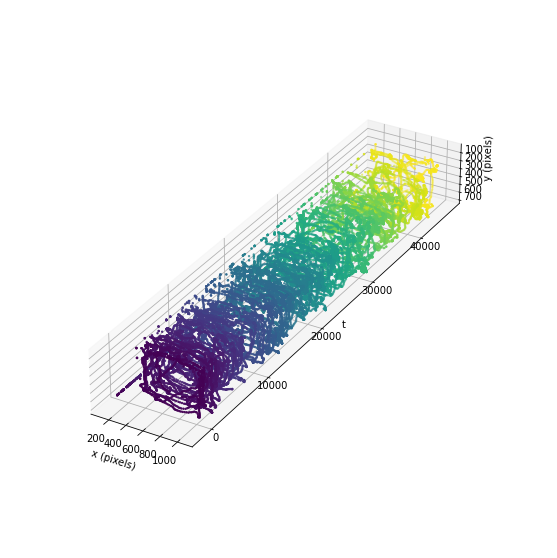

In [33]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')

ax.scatter3D(x_snout, Dataframe.index.values, y_snout, s=2, c= Dataframe.index.values, cmap= 'viridis')
ax.invert_zaxis()
ax.set_xlabel('x (pixels)')
ax.set_ylabel('t')
ax.set_zlabel('y (pixels)')


ax.set_box_aspect(((x_snout.max() - x_snout.min()), 5000, (y_snout.max() - y_snout.min())))

#BASELINE IS SHOWN BELOW

In [34]:
hdf_path = '/home/mclea2ll-local/Documents/DeepLabCut/Video_Analysis/SNR_LMO7_turning_Lily/snrbaseline_3903_f_Trial1DLC_resnet50_Pilot_v1_single_animalJun29shuffle1_400000_filtered.h5'
Dataframe = pd.read_hdf(hdf_path)

DLCscorer='DLC_resnet50_Pilot_v1_single_animalJun29shuffle1_400000'
bpt = 'snout'

x_snout = Dataframe[DLCscorer][bpt]['x'].values
y_snout = Dataframe[DLCscorer][bpt]['y'].values

ValueError: zero-size array to reduction operation maximum which has no identity

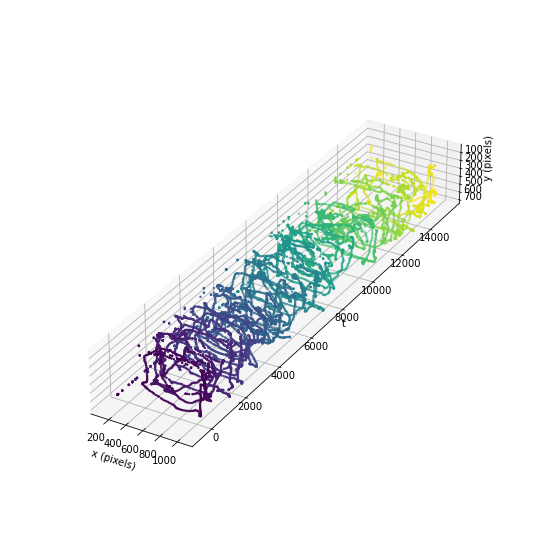

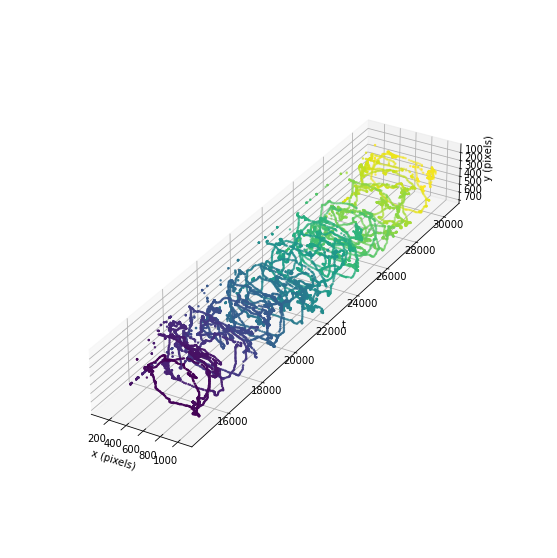

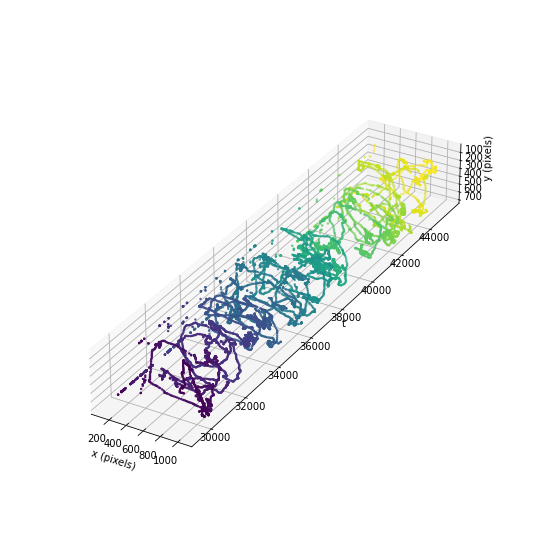

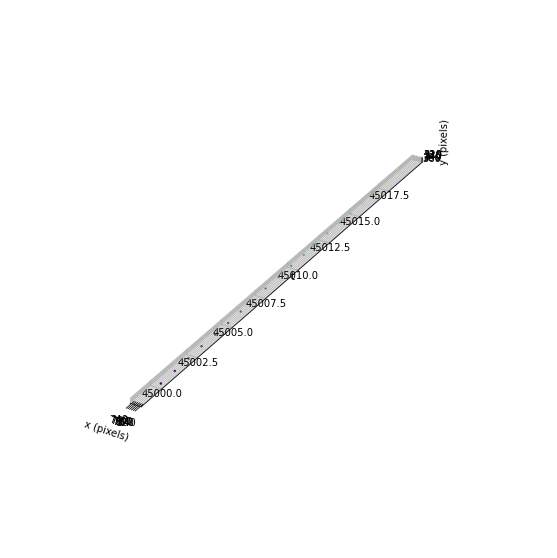

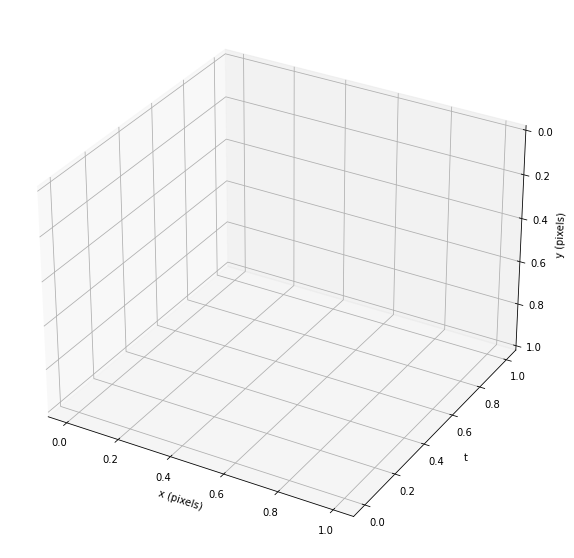

In [35]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')

xsnout10min = x_snout[0:15000]
ysnout10min = y_snout[0:15000]

ax.scatter3D(xsnout10min, Dataframe[0:15000].index.values, ysnout10min, s=2, c= Dataframe[0:15000].index.values, cmap= 'viridis')
ax.invert_zaxis()
ax.set_xlabel('x (pixels)')
ax.set_ylabel('t')
ax.set_zlabel('y (pixels)')

ax.set_box_aspect(((xsnout10min.max() - xsnout10min.min()), 5000, (ysnout10min.max() - ysnout10min.min())))

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')

xsnout10min = x_snout[15000:30000]
ysnout10min = y_snout[15000:30000]

ax.scatter3D(xsnout10min, Dataframe[15000:30000].index.values, ysnout10min, s=2, c= Dataframe[15000:30000].index.values, cmap= 'viridis')
ax.invert_zaxis()
ax.set_xlabel('x (pixels)')
ax.set_ylabel('t')
ax.set_zlabel('y (pixels)')

ax.set_box_aspect(((xsnout10min.max() - xsnout10min.min()), 5000, (ysnout10min.max() - ysnout10min.min())))

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')

xsnout10min = x_snout[30000:45000]
ysnout10min = y_snout[30000:45000]

ax.scatter3D(xsnout10min, Dataframe[30000:45000].index.values, ysnout10min, s=2, c= Dataframe[30000:45000].index.values, cmap= 'viridis')
ax.invert_zaxis()
ax.set_xlabel('x (pixels)')
ax.set_ylabel('t')
ax.set_zlabel('y (pixels)')

ax.set_box_aspect(((xsnout10min.max() - xsnout10min.min()), 5000, (ysnout10min.max() - ysnout10min.min())))

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')

xsnout10min = x_snout[45000:60000]
ysnout10min = y_snout[45000:60000]

ax.scatter3D(xsnout10min, Dataframe[45000:60000].index.values, ysnout10min, s=2, c= Dataframe[45000:60000].index.values, cmap= 'viridis')
ax.invert_zaxis()
ax.set_xlabel('x (pixels)')
ax.set_ylabel('t')
ax.set_zlabel('y (pixels)')

ax.set_box_aspect(((xsnout10min.max() - xsnout10min.min()), 5000, (ysnout10min.max() - ysnout10min.min())))

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')

xsnout10min = x_snout[60000:75000]
ysnout10min = y_snout[60000:75000]

ax.scatter3D(xsnout10min, Dataframe[60000:75000].index.values, ysnout10min, s=2, c= Dataframe[60000:75000].index.values, cmap= 'viridis')
ax.invert_zaxis()
ax.set_xlabel('x (pixels)')
ax.set_ylabel('t')
ax.set_zlabel('y (pixels)')

ax.set_box_aspect(((xsnout10min.max() - xsnout10min.min()), 5000, (ysnout10min.max() - ysnout10min.min())))

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')

xsnout10min = x_snout[75000:90000]
ysnout10min = y_snout[75000:90000]

ax.scatter3D(xsnout10min, Dataframe[75000:90000].index.values, ysnout10min, s=2, c= Dataframe[75000:90000].index.values, cmap= 'viridis')
ax.invert_zaxis()
ax.set_xlabel('x (pixels)')
ax.set_ylabel('t')
ax.set_zlabel('y (pixels)')

ax.set_box_aspect(((xsnout10min.max() - xsnout10min.min()), 5000, (ysnout10min.max() - ysnout10min.min())))

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')

xsnout10min = x_snout[90000:105000]
ysnout10min = y_snout[90000:105000]

ax.scatter3D(xsnout10min, Dataframe[90000:105000].index.values, ysnout10min, s=2, c= Dataframe[90000:105000].index.values, cmap= 'viridis')
ax.invert_zaxis()
ax.set_xlabel('x (pixels)')
ax.set_ylabel('t')
ax.set_zlabel('y (pixels)')

ax.set_box_aspect(((xsnout10min.max() - xsnout10min.min()), 5000, (ysnout10min.max() - ysnout10min.min())))

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')

xsnout10min = x_snout[105000:120000]
ysnout10min = y_snout[105000:120000]

ax.scatter3D(xsnout10min, Dataframe[105000:120000].index.values, ysnout10min, s=2, c= Dataframe[105000:120000].index.values, cmap= 'viridis')
ax.invert_zaxis()
ax.set_xlabel('x (pixels)')
ax.set_ylabel('t')
ax.set_zlabel('y (pixels)')

ax.set_box_aspect(((xsnout10min.max() - xsnout10min.min()), 5000, (ysnout10min.max() - ysnout10min.min())))

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')

xsnout10min = x_snout[120000:135000]
ysnout10min = y_snout[120000:135000]

ax.scatter3D(xsnout10min, Dataframe[120000:135000].index.values, ysnout10min, s=2, c= Dataframe[120000:135000].index.values, cmap= 'viridis')
ax.invert_zaxis()
ax.set_xlabel('x (pixels)')
ax.set_ylabel('t')
ax.set_zlabel('y (pixels)')

ax.set_box_aspect(((xsnout10min.max() - xsnout10min.min()), 5000, (ysnout10min.max() - ysnout10min.min())))

#BASELINE IS SHOWN BELOW

In [38]:
hdf_path = '/home/mclea2ll-local/Documents/DeepLabCut/Video_Analysis/SNR_LMO7_turning_Lily/snrffz_3903_f_Trial1DLC_resnet50_Pilot_v1_single_animalJun29shuffle1_400000_filtered.h5'
Dataframe = pd.read_hdf(hdf_path)

DLCscorer='DLC_resnet50_Pilot_v1_single_animalJun29shuffle1_400000'
bpt = 'snout'

x_snout = Dataframe[DLCscorer][bpt]['x'].values
y_snout = Dataframe[DLCscorer][bpt]['y'].values

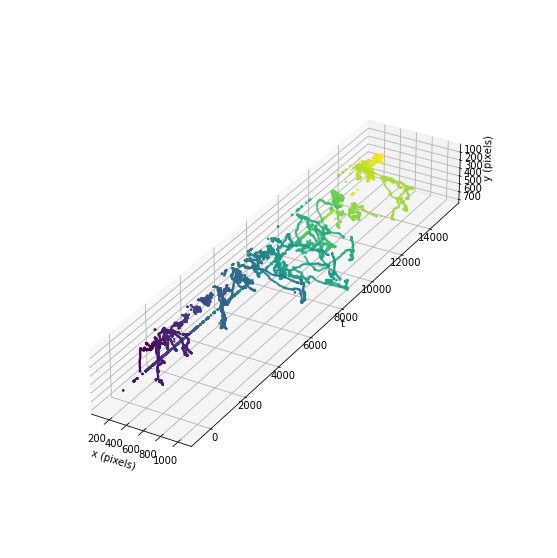

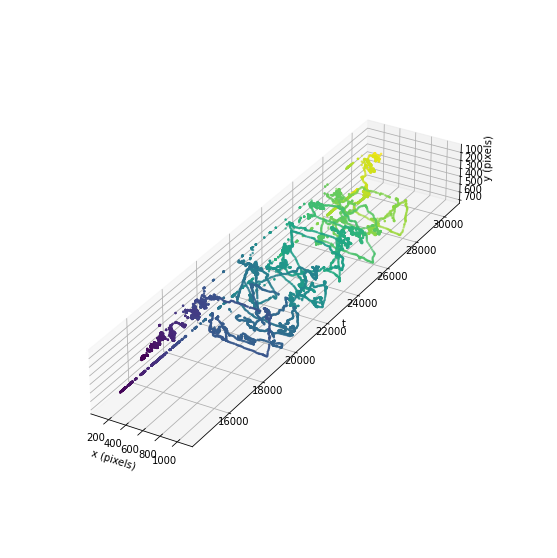

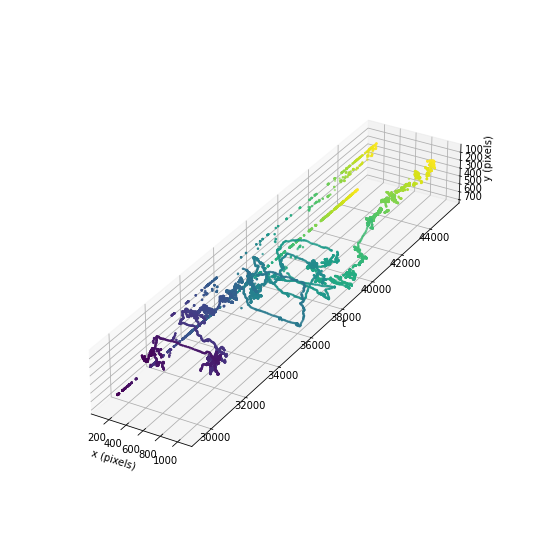

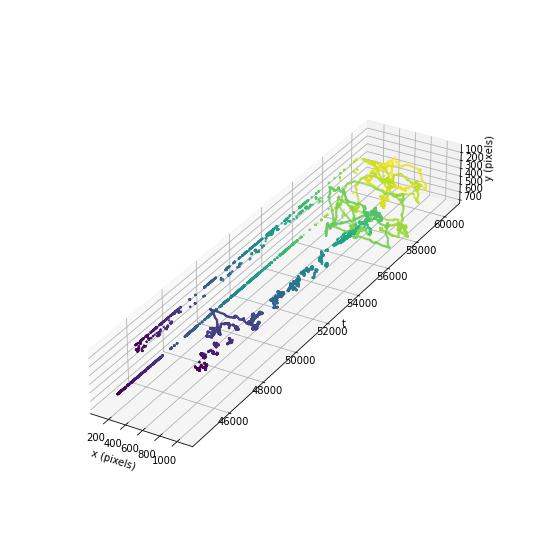

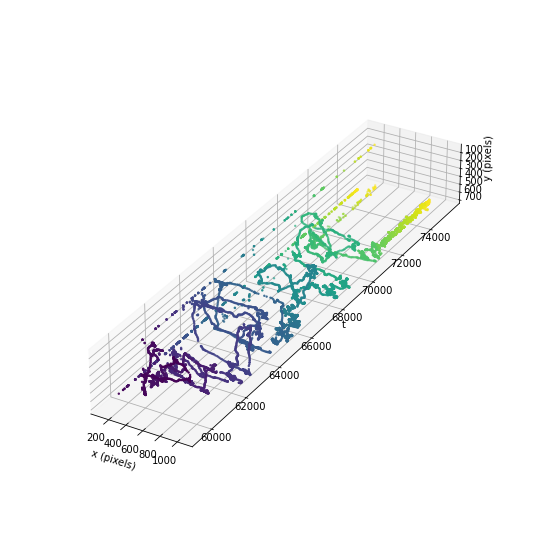

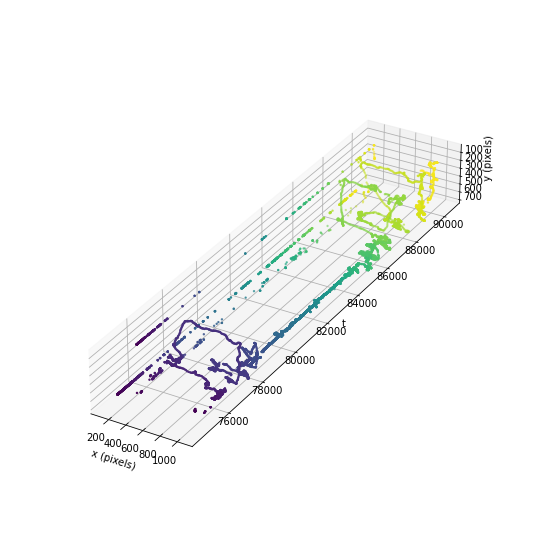

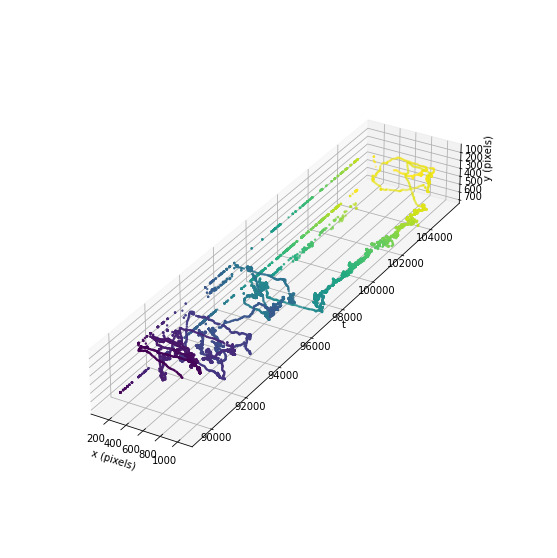

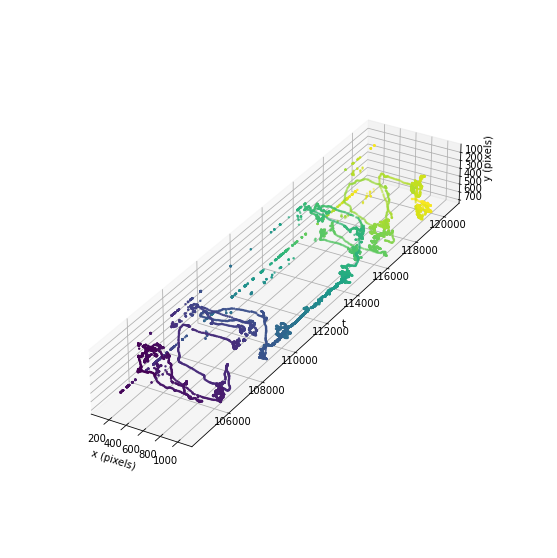

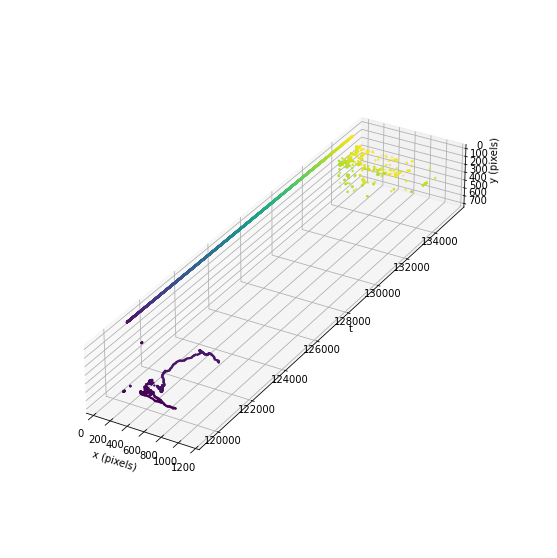

In [39]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')

xsnout10min = x_snout[0:15000]
ysnout10min = y_snout[0:15000]

ax.scatter3D(xsnout10min, Dataframe[0:15000].index.values, ysnout10min, s=2, c= Dataframe[0:15000].index.values, cmap= 'viridis')
ax.invert_zaxis()
ax.set_xlabel('x (pixels)')
ax.set_ylabel('t')
ax.set_zlabel('y (pixels)')

ax.set_box_aspect(((xsnout10min.max() - xsnout10min.min()), 5000, (ysnout10min.max() - ysnout10min.min())))

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')

xsnout10min = x_snout[15000:30000]
ysnout10min = y_snout[15000:30000]

ax.scatter3D(xsnout10min, Dataframe[15000:30000].index.values, ysnout10min, s=2, c= Dataframe[15000:30000].index.values, cmap= 'viridis')
ax.invert_zaxis()
ax.set_xlabel('x (pixels)')
ax.set_ylabel('t')
ax.set_zlabel('y (pixels)')

ax.set_box_aspect(((xsnout10min.max() - xsnout10min.min()), 5000, (ysnout10min.max() - ysnout10min.min())))

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')

xsnout10min = x_snout[30000:45000]
ysnout10min = y_snout[30000:45000]

ax.scatter3D(xsnout10min, Dataframe[30000:45000].index.values, ysnout10min, s=2, c= Dataframe[30000:45000].index.values, cmap= 'viridis')
ax.invert_zaxis()
ax.set_xlabel('x (pixels)')
ax.set_ylabel('t')
ax.set_zlabel('y (pixels)')

ax.set_box_aspect(((xsnout10min.max() - xsnout10min.min()), 5000, (ysnout10min.max() - ysnout10min.min())))

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')

xsnout10min = x_snout[45000:60000]
ysnout10min = y_snout[45000:60000]

ax.scatter3D(xsnout10min, Dataframe[45000:60000].index.values, ysnout10min, s=2, c= Dataframe[45000:60000].index.values, cmap= 'viridis')
ax.invert_zaxis()
ax.set_xlabel('x (pixels)')
ax.set_ylabel('t')
ax.set_zlabel('y (pixels)')

ax.set_box_aspect(((xsnout10min.max() - xsnout10min.min()), 5000, (ysnout10min.max() - ysnout10min.min())))

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')

xsnout10min = x_snout[60000:75000]
ysnout10min = y_snout[60000:75000]

ax.scatter3D(xsnout10min, Dataframe[60000:75000].index.values, ysnout10min, s=2, c= Dataframe[60000:75000].index.values, cmap= 'viridis')
ax.invert_zaxis()
ax.set_xlabel('x (pixels)')
ax.set_ylabel('t')
ax.set_zlabel('y (pixels)')

ax.set_box_aspect(((xsnout10min.max() - xsnout10min.min()), 5000, (ysnout10min.max() - ysnout10min.min())))

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')

xsnout10min = x_snout[75000:90000]
ysnout10min = y_snout[75000:90000]

ax.scatter3D(xsnout10min, Dataframe[75000:90000].index.values, ysnout10min, s=2, c= Dataframe[75000:90000].index.values, cmap= 'viridis')
ax.invert_zaxis()
ax.set_xlabel('x (pixels)')
ax.set_ylabel('t')
ax.set_zlabel('y (pixels)')

ax.set_box_aspect(((xsnout10min.max() - xsnout10min.min()), 5000, (ysnout10min.max() - ysnout10min.min())))

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')

xsnout10min = x_snout[90000:105000]
ysnout10min = y_snout[90000:105000]

ax.scatter3D(xsnout10min, Dataframe[90000:105000].index.values, ysnout10min, s=2, c= Dataframe[90000:105000].index.values, cmap= 'viridis')
ax.invert_zaxis()
ax.set_xlabel('x (pixels)')
ax.set_ylabel('t')
ax.set_zlabel('y (pixels)')

ax.set_box_aspect(((xsnout10min.max() - xsnout10min.min()), 5000, (ysnout10min.max() - ysnout10min.min())))

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')

xsnout10min = x_snout[105000:120000]
ysnout10min = y_snout[105000:120000]

ax.scatter3D(xsnout10min, Dataframe[105000:120000].index.values, ysnout10min, s=2, c= Dataframe[105000:120000].index.values, cmap= 'viridis')
ax.invert_zaxis()
ax.set_xlabel('x (pixels)')
ax.set_ylabel('t')
ax.set_zlabel('y (pixels)')

ax.set_box_aspect(((xsnout10min.max() - xsnout10min.min()), 5000, (ysnout10min.max() - ysnout10min.min())))

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')

xsnout10min = x_snout[120000:135000]
ysnout10min = y_snout[120000:135000]

ax.scatter3D(xsnout10min, Dataframe[120000:135000].index.values, ysnout10min, s=2, c= Dataframe[120000:135000].index.values, cmap= 'viridis')
ax.invert_zaxis()
ax.set_xlabel('x (pixels)')
ax.set_ylabel('t')
ax.set_zlabel('y (pixels)')

ax.set_box_aspect(((xsnout10min.max() - xsnout10min.min()), 5000, (ysnout10min.max() - ysnout10min.min())))

#FFZ IS SHOWN BELOW